# Projet Machine Learning: Damien Bukudjian

Durant ce projet, nous chercherons à définir si un champignon est comestible ou non selon ses caractéristiques.

Le [Jeu de données](https://www.kaggle.com/datasets/uciml/mushroom-classification "Jeu de données") utilisé.

In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('mushrooms.csv', index_col=0)

In [323]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,,,,,,,,,,,,,,,,,,,,,
p,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
e,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
e,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
p,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
e,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [324]:
df.shape

(8124, 22)

In [325]:
df.dtypes

cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [326]:
df.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [327]:
for name in df.columns:
    df[name] = df[name].astype("category").cat.codes

In [328]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,,,,,,,,,,,,,,,,,,,,,
p,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
e,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
e,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
p,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
e,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [329]:
def split(df, group):
     gb = df.groupby(group)
     return [gb.get_group(x) for x in gb.groups]
splitted = split(df,"class")

dfE = pd.DataFrame(data=splitted[0])
dfE.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,,,,,,,,,,,,,,,,,,,,,
e,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
e,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
e,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
e,5,3,9,1,0,1,0,0,5,0,...,2,7,7,0,2,1,4,2,2,1
e,0,2,8,1,0,1,0,0,2,0,...,2,7,7,0,2,1,4,2,2,3


In [330]:
dfP = pd.DataFrame(data=splitted[1])
dfP.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,,,,,,,,,,,,,,,,,,,,,
p,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
p,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
p,5,3,8,1,6,1,0,1,7,0,...,2,7,7,0,2,1,4,2,4,1
p,5,3,8,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,3,4,5
p,5,2,4,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,1


In [331]:
def plotByFeature(dfE,dfP, name):
    dfEval = pd.DataFrame(data=dfE[name].value_counts())
    dfPval = pd.DataFrame(data=dfP[name].value_counts())
    fig, (ax1,ax2) = plt.subplots(1,2)
    ax1.pie(dfEval[name],labels=dfEval.index,autopct='%1.1f%%')
    ax1.set_title("Edible")
    ax2.pie(dfPval[name],labels=dfPval.index,autopct='%1.1f%%')
    ax2.set_title("Poisonous")
    fig.suptitle(name,y=0.90)
    plt.show()

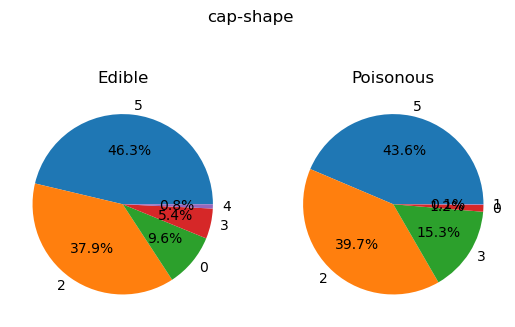

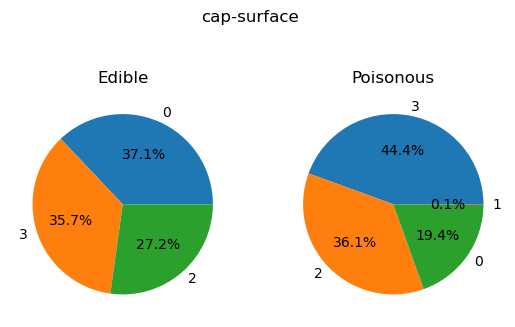

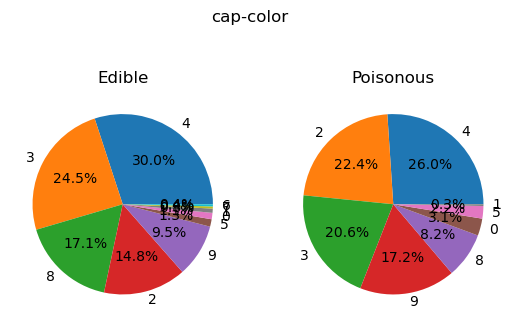

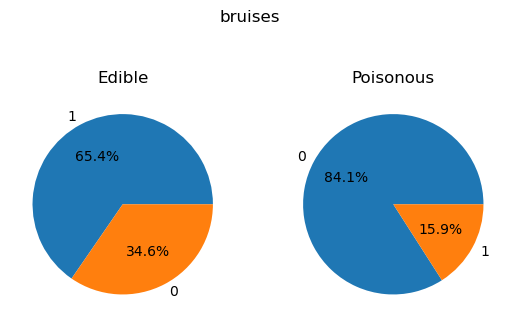

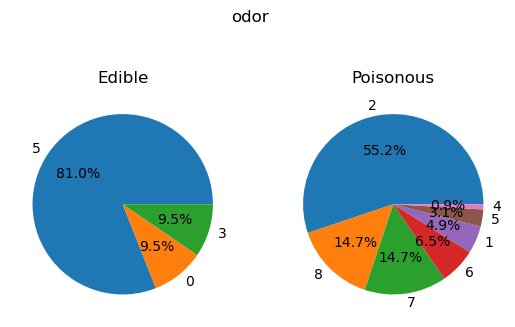

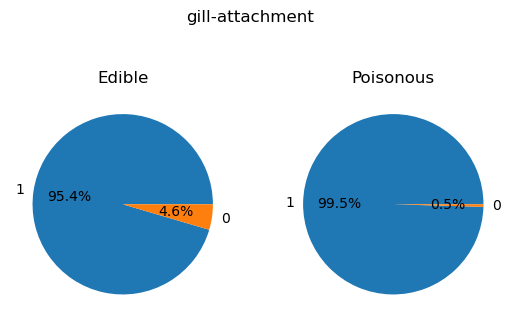

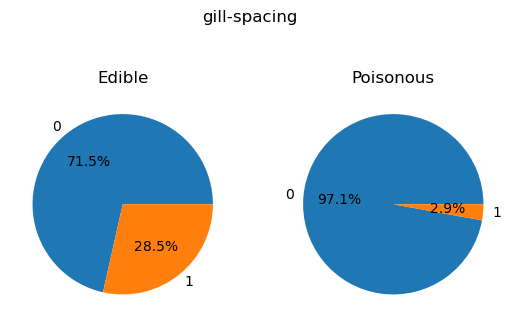

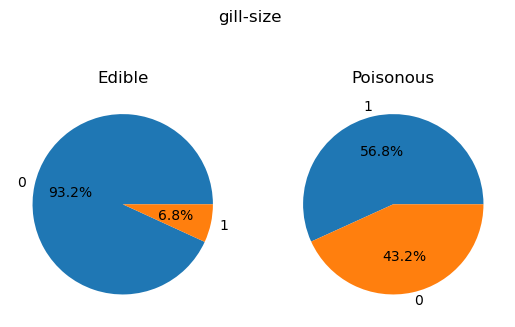

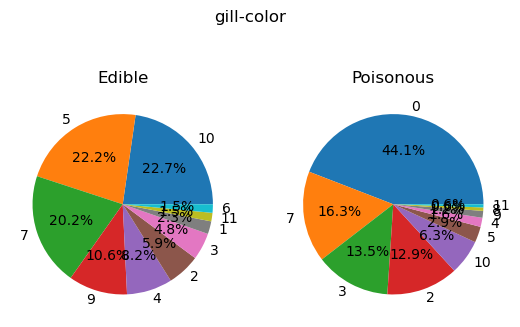

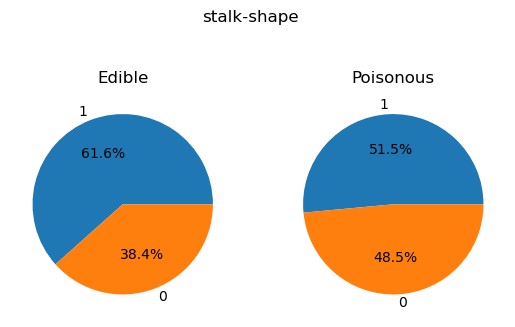

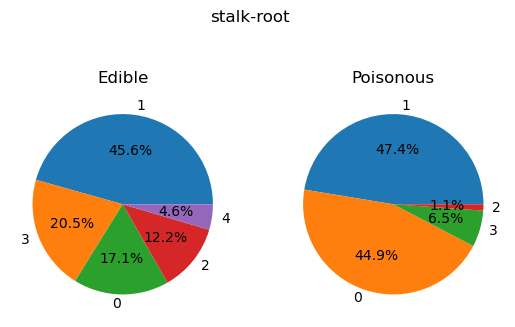

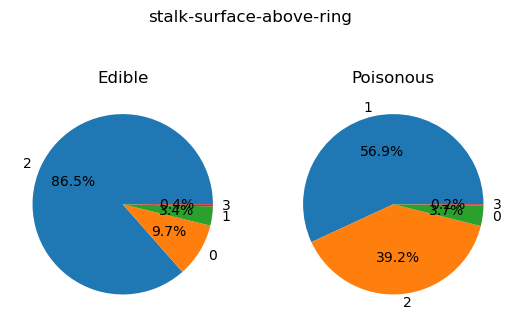

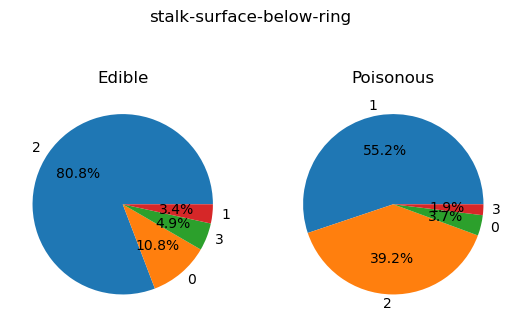

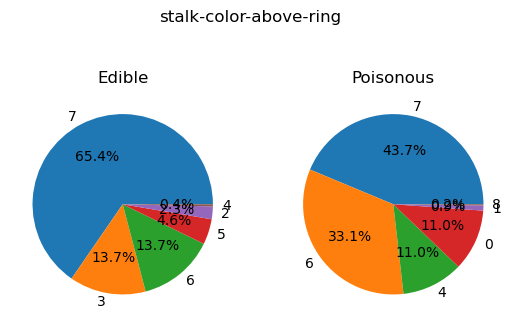

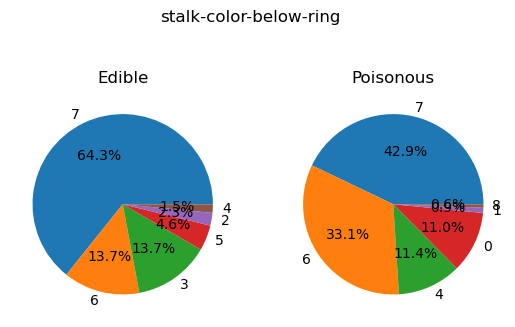

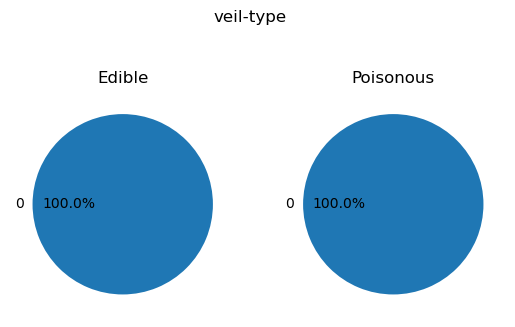

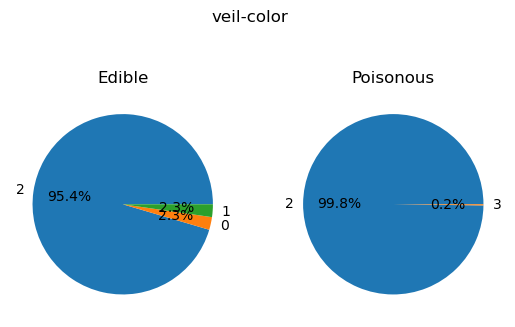

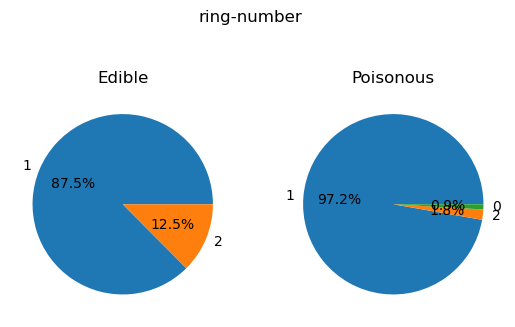

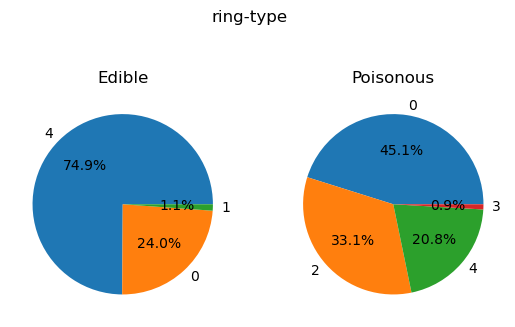

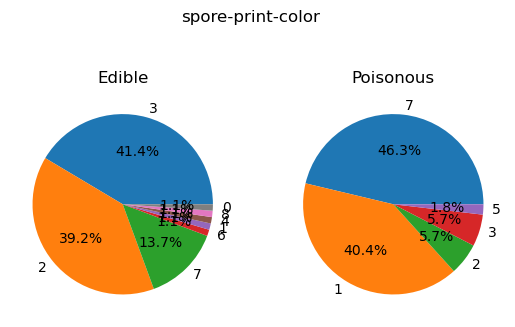

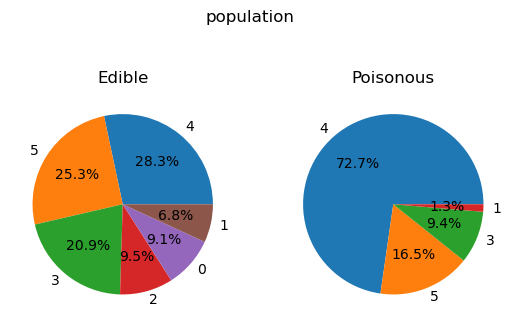

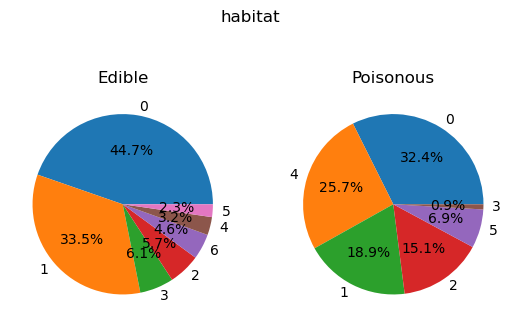

In [332]:
for name in dfE:
    plotByFeature(dfE,dfP,name)

In [333]:
from sklearn.model_selection import train_test_split
df=df.reset_index()
df["class"] = df["class"].astype("category").cat.codes

x=df.drop("class", axis=1)
y=df["class"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [334]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=1, max_iter=2000)
clf.fit(X_train, y_train)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

train accuracy = 0.9475905733380232
test accuracy = 0.9491386382280558


In [335]:
coeff = pd.DataFrame()
coeff['Feature'] = X_train.columns
coeff['Coefficient Estimate'] = pd.Series(clf.coef_[0])
coeff.loc[len(coeff)]=['Intercept',clf.intercept_[0]]
print (coeff)

                     Feature  Coefficient Estimate
0                  cap-shape             -0.023087
1                cap-surface              0.451314
2                  cap-color             -0.063192
3                    bruises             -0.971589
4                       odor             -0.534483
5            gill-attachment             -1.588337
6               gill-spacing             -6.552256
7                  gill-size              6.964753
8                 gill-color             -0.134093
9                stalk-shape              0.247612
10                stalk-root             -1.556391
11  stalk-surface-above-ring             -4.234187
12  stalk-surface-below-ring             -0.258499
13    stalk-color-above-ring             -0.138440
14    stalk-color-below-ring             -0.038249
15                 veil-type              0.000000
16                veil-color              6.148516
17               ring-number              1.356769
18                 ring-type   

In [336]:
#On supprime habitat et veil-type car on peut voir que leur coefficient sont trop proche de zero
df.drop(["habitat","veil-type"],axis=1,inplace=True)

In [337]:
for name in df.columns:
    if df[name].nunique()>3:
        for iname in df[name].unique():
            col=str(name)+"_"+str(iname)
            df[col]= (df[name] == iname).astype("int")
        df.drop(name,axis=1,inplace=True)

In [338]:
df.head()

,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,ring-number,cap-shape_5,cap-shape_0,cap-shape_4,...,spore-print-color_5,spore-print-color_4,spore-print-color_8,spore-print-color_0,population_3,population_2,population_0,population_4,population_5,population_1
0,1,1,1,0,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,1,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,1,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1,1,0,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,1,0,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [339]:
df.shape

(8124, 103)

In [340]:
x=df.drop("class", axis=1)
y=df["class"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

clf = LogisticRegression(random_state=1, max_iter=2000)
clf.fit(X_train, y_train)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print ('train accuracy =', train_score)
print ('test accuracy =', test_score)

train accuracy = 0.9994723883221949
test accuracy = 0.9987694831829368


In [341]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, x, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.70479705 1.         1.         1.         0.99630542 1.
 1.         1.         0.86330049 1.        ]
0.956440295930053


In [342]:
y_predProb = np.round(clf.predict_proba(X_test),3)

In [343]:
# 0 = edible, 1 = poisonous
y_pred = np.full((1,len(y_predProb)),1)
for i in range(len(y_predProb)):
    if y_predProb[i][0] > 0.5 and y_predProb[i][0] < 0.75:
        y_pred[0][i] = 1
    elif y_predProb[i][0] >= 0.75:
        y_pred[0][i] = 0
    else:
        y_pred[0][i] = 1

In [344]:
pred = pd.DataFrame({        
        "Poisoned_original": y_test.squeeze(),
        "Poisoned_predicted": y_pred[0],
        "Poisoned_proba": np.transpose(y_predProb)[1]      
        })
pred["Comparison"]= pred.Poisoned_original ==pred.Poisoned_predicted
pred.head()

,Poisoned_original,Poisoned_predicted,Poisoned_proba,Comparison
1392,0,0,0.001,True
4051,1,1,0.971,True
3725,1,1,0.988,True
7177,1,1,1.000,True
103,0,0,0.003,True


In [345]:
pred["Comparison"].value_counts(normalize=True) * 100

True    100.0
Name: Comparison, dtype: float64

In [346]:
pred[~pred["Comparison"]]

,Poisoned_original,Poisoned_predicted,Poisoned_proba,Comparison


En considérant qu'un champignon ayant plus de 25% de chance de ne pas être comestible est empoisonné (il vaut mieux prédire un faux positif qu'un faux négatif), on obtient alors 100% de précision pour ce dataset de test